In [68]:
!pip install scikit-plot

In [418]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [419]:
filepath="https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"
data=pd.read_csv(filepath)

In [420]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [421]:
## finding the missing Value
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

## There is No Missing Value

In [422]:
## Now We will find the DataType of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [423]:
# creating a list of columns which are categorical or contains string values. 
string_cols = list(data.select_dtypes(include='object').columns)
string_cols

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [424]:
# Creating a list of columns which are numeric. 
numeric_cols = list(data.select_dtypes(exclude='object').columns)
numeric_cols

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

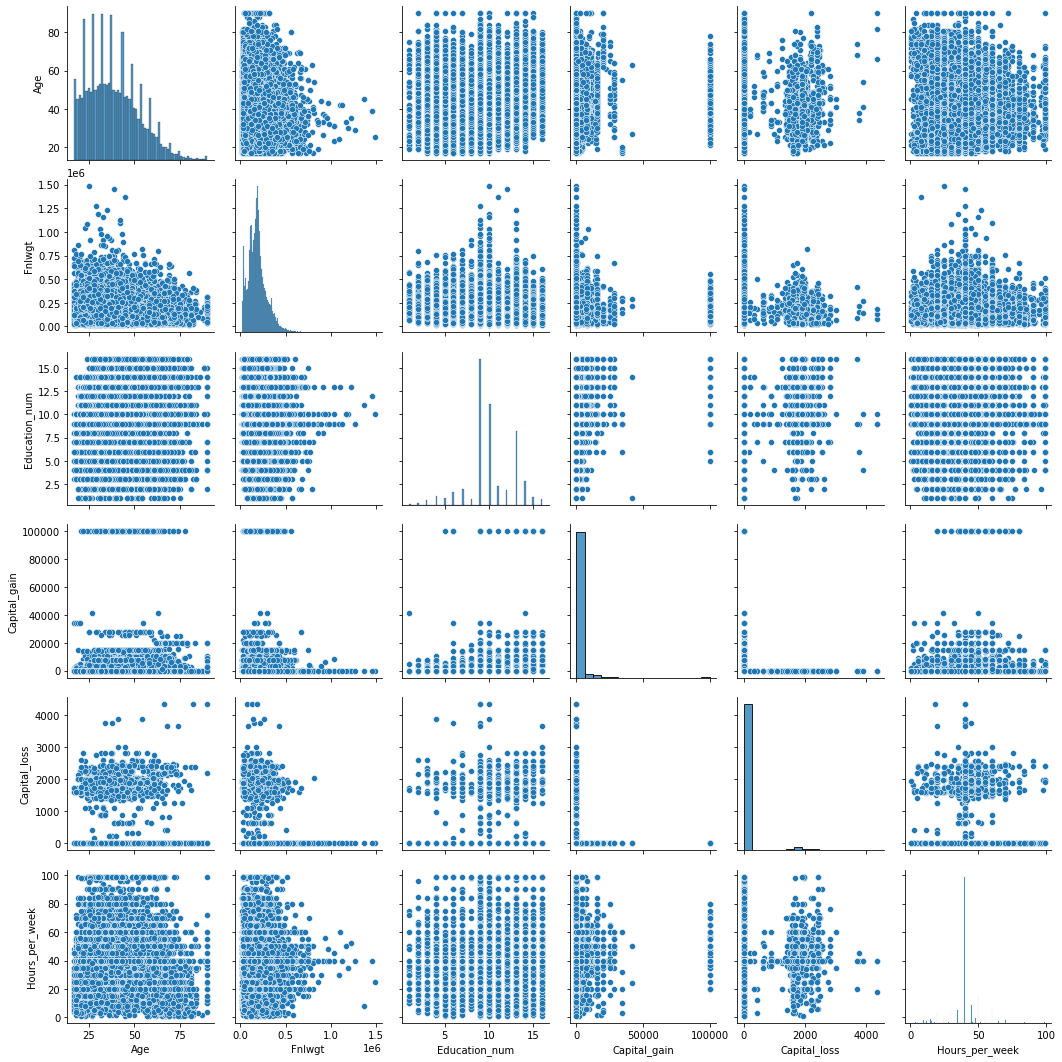

In [425]:
#lets check the data distribution of numeric columns
sns.pairplot(data[numeric_cols])
plt.show()

In [426]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [427]:
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Fnlwgt
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64

Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool       

In [428]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [429]:
data.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


### Converting Object DataType into Int

In [430]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Education'] = le.fit_transform(data['Education'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,12,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,7,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,11,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,11,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [431]:
data['Workclass'] = le.fit_transform(data['Workclass'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,4,215646,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,4,234721,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,4,338409,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,4,284582,12,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,4,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,4,151910,11,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,4,201490,11,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [432]:
data['Marital_status'] = le.fit_transform(data['Marital_status'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,4,215646,11,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,4,234721,1,7,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,4,338409,9,13,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,4,284582,12,14,2,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,4,154374,11,9,2,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,4,151910,11,9,6,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,4,201490,11,9,4,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [433]:
data['Occupation'] = le.fit_transform(data['Occupation'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,Husband,White,Male,0,0,13,United-States,<=50K
1,38,4,215646,11,9,0,6,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,4,234721,1,7,2,6,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,4,338409,9,13,2,10,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,4,284582,12,14,2,4,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,4,154374,11,9,2,7,Husband,White,Male,0,0,40,United-States,>50K
32557,58,4,151910,11,9,6,1,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,4,201490,11,9,4,1,Own-child,White,Male,0,0,20,United-States,<=50K


In [434]:
data['Relationship'] = le.fit_transform(data['Relationship'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,White,Male,0,0,13,United-States,<=50K
1,38,4,215646,11,9,0,6,1,White,Male,0,0,40,United-States,<=50K
2,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,United-States,<=50K
3,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,Cuba,<=50K
4,37,4,284582,12,14,2,4,5,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,White,Female,0,0,38,United-States,<=50K
32556,40,4,154374,11,9,2,7,0,White,Male,0,0,40,United-States,>50K
32557,58,4,151910,11,9,6,1,4,White,Female,0,0,40,United-States,<=50K
32558,22,4,201490,11,9,4,1,3,White,Male,0,0,20,United-States,<=50K


In [435]:
data['Race'] = le.fit_transform(data['Race'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,Male,0,0,13,United-States,<=50K
1,38,4,215646,11,9,0,6,1,4,Male,0,0,40,United-States,<=50K
2,53,4,234721,1,7,2,6,0,2,Male,0,0,40,United-States,<=50K
3,28,4,338409,9,13,2,10,5,2,Female,0,0,40,Cuba,<=50K
4,37,4,284582,12,14,2,4,5,4,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,Female,0,0,38,United-States,<=50K
32556,40,4,154374,11,9,2,7,0,4,Male,0,0,40,United-States,>50K
32557,58,4,151910,11,9,6,1,4,4,Female,0,0,40,United-States,<=50K
32558,22,4,201490,11,9,4,1,3,4,Male,0,0,20,United-States,<=50K


In [436]:
data['Sex'] = le.fit_transform(data['Sex'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,United-States,<=50K
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,United-States,<=50K
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,United-States,<=50K
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,Cuba,<=50K
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,United-States,<=50K
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,United-States,>50K
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,United-States,<=50K
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,United-States,<=50K


In [437]:
data['Native_country'] = le.fit_transform(data['Native_country'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,<=50K
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,>50K
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,<=50K
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,<=50K


In [438]:
data['Income'] = le.fit_transform(data['Income'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [439]:
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand', 'Income']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Income
0,"(16.927, 31.6]",0.075480
1,"(31.6, 46.2]",0.319902
2,"(46.2, 60.8]",0.384111
3,"(60.8, 75.4]",0.244381
4,"(75.4, 90.0]",0.165975


In [440]:
data.loc[ (data['Age'] >= 16.927) & (data['Age'] <= 31.6),'Age'] = 0
data.loc[(data['Age'] > 31.6) & (data['Age'] <= 46.2), 'Age'] = 1
data.loc[(data['Age'] > 46.2) & (data['Age'] <= 60.8), 'Age'] = 2
data.loc[(data['Age'] > 60.8) & (data['Age'] <= 75.4), 'Age'] = 3
data.loc[ data['Age'] > 75.4, 'Age'] = 4
data['Age'] = data['Age'].astype(int)
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,AgeBand
0,2,6,83311,9,13,2,4,0,4,1,0,0,13,39,0,"(46.2, 60.8]"
1,1,4,215646,11,9,0,6,1,4,1,0,0,40,39,0,"(31.6, 46.2]"
2,2,4,234721,1,7,2,6,0,2,1,0,0,40,39,0,"(46.2, 60.8]"
3,0,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,"(16.927, 31.6]"
4,1,4,284582,12,14,2,4,5,4,0,0,0,40,39,0,"(31.6, 46.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,4,257302,7,12,2,13,5,4,0,0,0,38,39,0,"(16.927, 31.6]"
32556,1,4,154374,11,9,2,7,0,4,1,0,0,40,39,1,"(31.6, 46.2]"
32557,2,4,151910,11,9,6,1,4,4,0,0,0,40,39,0,"(46.2, 60.8]"
32558,0,4,201490,11,9,4,1,3,4,1,0,0,20,39,0,"(16.927, 31.6]"


In [441]:
data = data.drop(['AgeBand'], axis=1)

In [442]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,2,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,2,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,0,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,1,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,1,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,2,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,0,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [443]:
data['FnlwgtBand'] = pd.cut(data['Fnlwgt'], 5)
data[['FnlwgtBand', 'Income']].groupby(['FnlwgtBand'], as_index=False).mean().sort_values(by='FnlwgtBand', ascending=True)

,FnlwgtBand,Income
0,"(10812.58, 306769.0]",0.240833
1,"(306769.0, 601253.0]",0.242013
2,"(601253.0, 895737.0]",0.204918
3,"(895737.0, 1190221.0]",0.200000
4,"(1190221.0, 1484705.0]",0.200000


In [444]:
data.loc[ (data['Fnlwgt'] >= 10812.58) & (data['Fnlwgt'] <= 306769.0),'Fnlwgt'] = 0
data.loc[(data['Fnlwgt'] > 306769.0) & (data['Fnlwgt'] <= 601253.0), 'Fnlwgt'] = 1
data.loc[(data['Fnlwgt'] > 601253.0) & (data['Fnlwgt'] <= 895737.0), 'Fnlwgt'] = 2
data.loc[(data['Fnlwgt'] > 895737.0) & (data['Fnlwgt'] <= 1190221.0), 'Fnlwgt'] = 3
data.loc[ data['Fnlwgt'] > 1190221.0, 'Fnlwgt'] = 4
data['Fnlwgt'] = data['Fnlwgt'].astype(int)
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,FnlwgtBand
0,2,6,0,9,13,2,4,0,4,1,0,0,13,39,0,"(10812.58, 306769.0]"
1,1,4,0,11,9,0,6,1,4,1,0,0,40,39,0,"(10812.58, 306769.0]"
2,2,4,0,1,7,2,6,0,2,1,0,0,40,39,0,"(10812.58, 306769.0]"
3,0,4,1,9,13,2,10,5,2,0,0,0,40,5,0,"(306769.0, 601253.0]"
4,1,4,0,12,14,2,4,5,4,0,0,0,40,39,0,"(10812.58, 306769.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,4,0,7,12,2,13,5,4,0,0,0,38,39,0,"(10812.58, 306769.0]"
32556,1,4,0,11,9,2,7,0,4,1,0,0,40,39,1,"(10812.58, 306769.0]"
32557,2,4,0,11,9,6,1,4,4,0,0,0,40,39,0,"(10812.58, 306769.0]"
32558,0,4,0,11,9,4,1,3,4,1,0,0,20,39,0,"(10812.58, 306769.0]"


In [445]:
data = data.drop(['FnlwgtBand'], axis=1)

In [446]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,2,6,0,9,13,2,4,0,4,1,0,0,13,39,0
1,1,4,0,11,9,0,6,1,4,1,0,0,40,39,0
2,2,4,0,1,7,2,6,0,2,1,0,0,40,39,0
3,0,4,1,9,13,2,10,5,2,0,0,0,40,5,0
4,1,4,0,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,4,0,7,12,2,13,5,4,0,0,0,38,39,0
32556,1,4,0,11,9,2,7,0,4,1,0,0,40,39,1
32557,2,4,0,11,9,6,1,4,4,0,0,0,40,39,0
32558,0,4,0,11,9,4,1,3,4,1,0,0,20,39,0


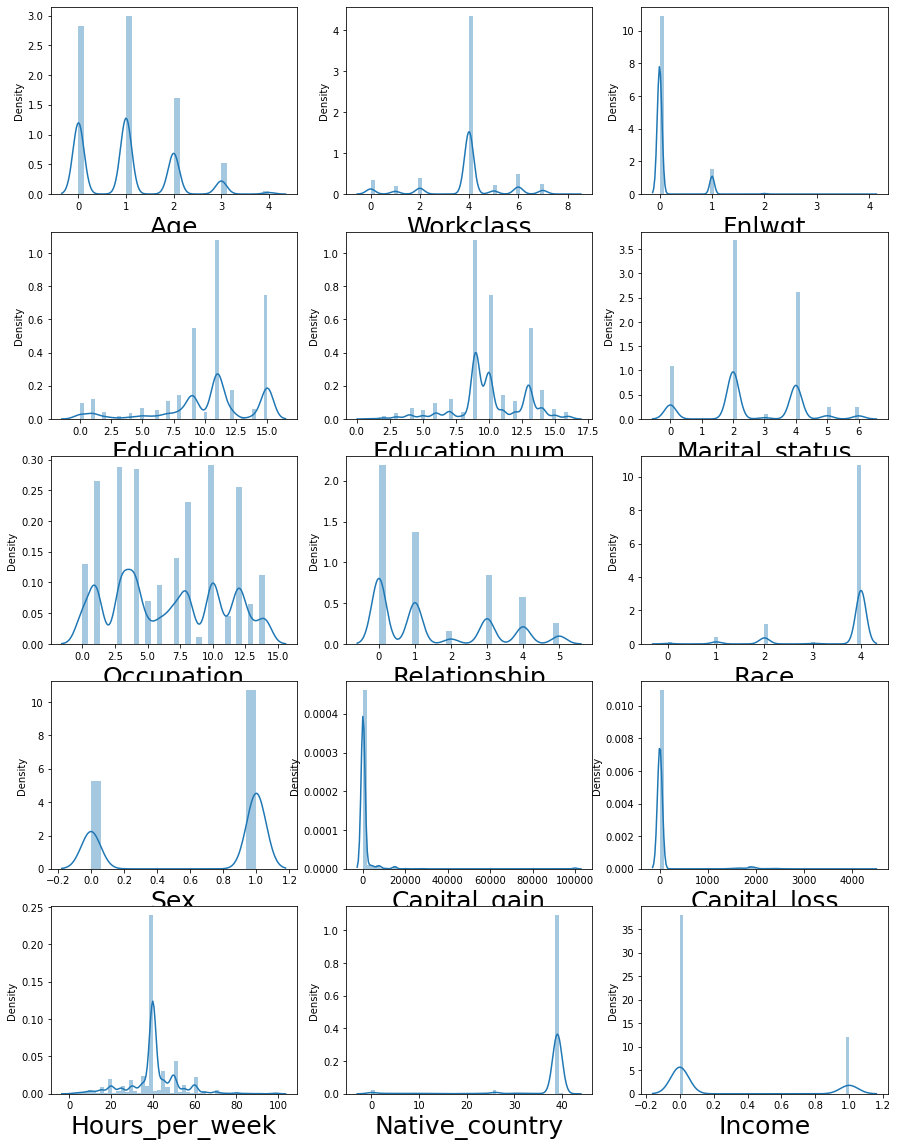

In [448]:
### Now we will visualize the data

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1


#for columns in data.columns.values:
for column in data:
    if plotnumber<=15:
        
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

<AxesSubplot:>

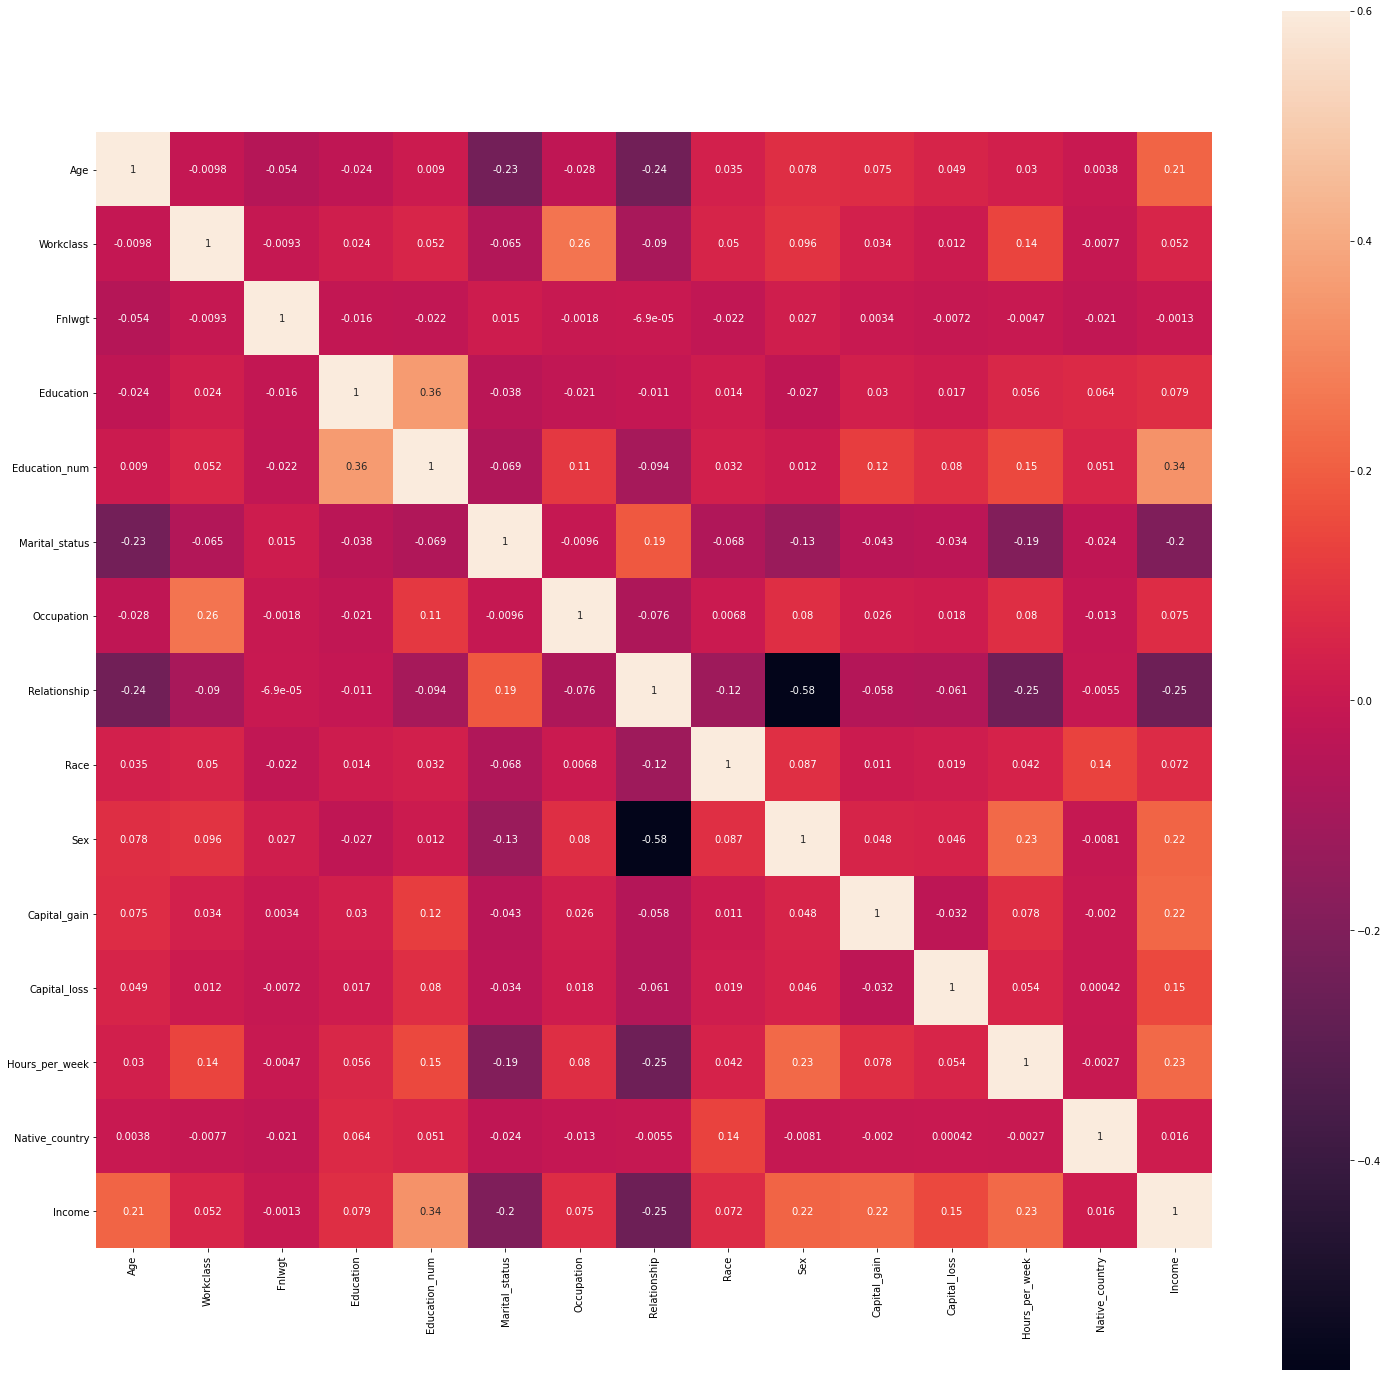

In [449]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), vmax=0.6, square=True, annot=True)

## We will check the skewness


In [450]:
data.skew()

Age                0.685452
Workclass         -0.752280
Fnlwgt             2.719933
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

## Removing The Skewness using Z-Score

In [451]:
from scipy.stats import zscore
import numpy as np

In [452]:
z=np.abs(zscore(data))
threshold=3
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(32560, 15)
(27493, 15)


In [453]:
data_new.skew()

Age                0.587757
Workclass         -0.733117
Fnlwgt             2.267219
Education         -0.959185
Education_num     -0.142544
Marital_status    -0.052969
Occupation         0.132693
Relationship       0.746763
Race              -2.572284
Sex               -0.684235
Capital_gain       4.922280
Capital_loss      29.666284
Hours_per_week    -0.351990
Native_country    -5.405587
Income             1.322664
dtype: float64

## Splitting The DataSet Into "X" as a Features and "Y" as a Label or Vectors

In [456]:
X = data_new.drop("Income", axis=1)
Y = data_new["Income"]

## Building The Model

In [457]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(X)
acc_log = round(logreg.score(X, Y) * 100, 2)
acc_log

82.41

In [458]:
# Support Vector Machines

svc = SVC()
svc.fit(X, Y)
Y_pred = svc.predict(X)
acc_svc = round(svc.score(X, Y) * 100, 2)
acc_svc

81.25

In [459]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, Y)
Y_pred = knn.predict(X)
acc_knn = round(knn.score(X, Y) * 100, 2)
acc_knn

88.87

In [460]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X, Y)
Y_pred = gaussian.predict(X)
acc_gaussian = round(gaussian.score(X, Y) * 100, 2)
acc_gaussian

79.03

In [461]:
linear_svc = LinearSVC()
linear_svc.fit(X, Y)
Y_pred = linear_svc.predict(X)
acc_linear_svc = round(linear_svc.score(X, Y) * 100, 2)
acc_linear_svc

78.78

In [462]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X, Y)
Y_pred = sgd.predict(X)
acc_sgd = round(sgd.score(X, Y) * 100, 2)
acc_sgd

80.98

In [463]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X, Y)
Y_pred = dt.predict(X)
acc_decision_tree = round(dt.score(X, Y) * 100, 2)
acc_decision_tree

93.92

In [464]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
Y_pred = random_forest.predict(X)
random_forest.score(X, Y)
acc_random_forest = round(random_forest.score(X, Y) * 100, 2)
acc_random_forest

93.92

## Cross_validation Of The Model

In [465]:
from sklearn.model_selection import cross_val_score
cross_lr=cross_val_score(logreg,X,Y,cv=5)
cross_lr=cross_val_score(logreg,X,Y,cv=5).mean()
cross_lr

0.8226820498664033

In [466]:
cross_svc=cross_val_score(svc,X,Y,cv=5)

cross_svc=cross_val_score(svc,X,Y,cv=5).mean()
cross_svc

0.8121340227142724

In [467]:
cross_knn=cross_val_score(knn,X,Y,cv=5)

cross_knn=cross_val_score(knn,X,Y,cv=5).mean()
cross_knn

0.8336307186643481

In [468]:
cross_gaussian=cross_val_score(gaussian,X,Y,cv=5)

cross_gaussian=cross_val_score(gaussian,X,Y,cv=5).mean()
cross_gaussian

0.7902743387120685

In [469]:
cross_linear_svc=cross_val_score(linear_svc,X,Y,cv=5)

cross_linear_svc=cross_val_score(linear_svc,X,Y,cv=5).mean()
cross_linear_svc

0.7724481272463906

In [470]:
cross_sgd=cross_val_score(sgd,X,Y,cv=5)

cross_sgd=cross_val_score(sgd,X,Y,cv=5).mean()
cross_sgd

0.7978393505323995

In [471]:
cross_dt=cross_val_score(dt,X,Y,cv=5)
cross_dt=cross_val_score(dt,X,Y,cv=5).mean()

cross_dt

0.8239919808165128

In [472]:
cross_random_forest=cross_val_score(random_forest,X,Y,cv=5)
cross_random_forest=cross_val_score(random_forest,X,Y,cv=5).mean()

cross_random_forest 

0.8456338005435162

## Building DataFrames

In [473]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree],
     'cross_val_score':[cross_lr,cross_svc,cross_knn,
                       cross_gaussian,cross_linear_svc,
                       cross_sgd,cross_dt,cross_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score,cross_val_score
3,Random Forest,93.92,0.790274
7,Decision Tree,93.92,0.845634
1,KNN,88.87,0.812134
2,Logistic Regression,82.41,0.833631
0,Support Vector Machines,81.25,0.822682
5,Stochastic Gradient Decent,80.98,0.797839
4,Naive Bayes,79.03,0.772448
6,Linear SVC,78.78,0.823992


## Hyper-Parameter Tunning

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15,20,25)
param_grid = {'C': c_space}
search= GridSearchCV(logreg, param_grid, cv = 5)

In [ ]:
search.fit(X,Y)

In [476]:
best_model = search.best_params_
best_model

{'C': 268.2695795279727}

In [479]:
logreg = LogisticRegression(C= 268.2695795279727)
logreg.fit(X, Y)
Y_pred = logreg.predict(X)
acc_log = round(logreg.score(X, Y) * 100, 2)
acc_log

82.36

# Plotting The ROC-AUC_CURVE

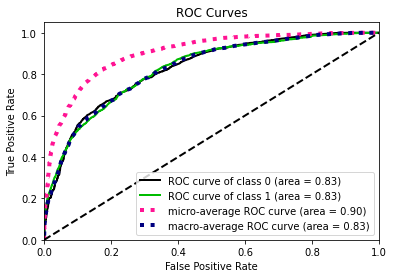

In [480]:
from sklearn.metrics import roc_curve
import scikitplot as skl
probas=logreg.predict_proba(X)
skl.metrics.plot_roc(Y,probas)
plt.show()

## Saving The Project

In [481]:
import joblib
joblib.dump(logreg,"CensusIncomeModel.pkl")

['CensusIncomeModel.pkl']